#<font color = 'Orange'>Scraping page</font>
You need to scrape the phones with their price from: https://mobelix.com.mk/mk/mobilni-telefoni

The informations you need to extract are:


*   Phone brand: html tag (\<h5 class="mb-0">\)
*   Phone type: html tag (\<h3 class="h5 font-weight-normal">\)
*   Phone pruce: html tag (\<p class="h5 price">\)



# <font color='Orange'>Requirements specified for Web Scraping</font> (0.1 POINTS)


Import all libraries and modules that you are going to use.

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> (0.3 POINTS)


 **Fetch a website's content - send request**

In [6]:
URL = "https://mobelix.com.mk/mk/mobilni-telefoni"
PAGES = 21 #bad practice, only for the purpose of the homework

def get_page_url(url, page_num):
  return f'{url}?page={page_num}'



In [7]:
get_page_url(URL, 5)

'https://mobelix.com.mk/mk/mobilni-telefoni?page=5'

In [73]:
def scrape_pages():
  brands = []
  types = []
  prices = []

  for i in range(PAGES):
    curr_url = get_page_url(URL,i+1)
    html = requests.get(curr_url)
    details = scrape_details(html.text)
    brands+=details['phone_brands']
    types+=details['phone_types']
    prices+=details['phone_prices']

  return {'brands':brands,'types':types,'prices':prices}

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [12]:
# html.status_code

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font> (0.3 POINTS)

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.


**Parse using BeautifulSoap**




In [74]:
def scrape_details(html_text):
  soup = BeautifulSoup(html_text,'html.parser')
  # brands
  brands = soup.find_all('h5',{"class":"mb-0"})
  brands = [b.text for b in brands]

  # types
  types = soup.find_all('h3', 'h5 font-weight-normal')
  types = [t.text for t in types]

  # prices
  prices = soup.find_all('p',"h5")
  for i in range(len(prices)):
    price_splitted = prices[i].text.split('.')

    if len(price_splitted)>2:
      # 2 prices
      prices[i] = price_splitted[1][2:]
    else:
      prices[i] = prices[i].text[:-7]

    prices[i]= int(prices[i].replace(",",""))


  return {'phone_brands':brands,'phone_types':types,'phone_prices':prices}

In [46]:
scrape_details(requests.get('https://mobelix.com.mk/mk/mobilni-telefoni?page=1').text)

{'phone_brands': ['Blackberry',
  'Samsung',
  'Samsung',
  'Apple',
  'Apple',
  'Apple',
  'Apple',
  'Apple',
  'Apple'],
 'phone_types': ['Porsche Design P9981',
  'Galaxy A03s 4/64GB',
  'Galaxy A04s 3/32GB',
  'iPhone 14 Pro Max 128GB E-SIM',
  'iPhone 14 Pro 512GB',
  'iPhone 14 Pro Max 512GB',
  'iPhone 14 Pro Max 1TB',
  'iPhone 14 Pro 128GB E-SIM',
  'iPhone 13 Mini 256GB'],
 'phone_prices': [19000, 8300, 8300, 61500, 89200, 78100, 98400, 55300, 46800]}

**Print the HTML code that you get**

In [ ]:
#add your code

# <font color='Orange'>Extracting data</font> (0.7 POINTS)

From the printed HTML code search for the data you need for building the dataset, by the classes that are given above in the html tags listed.



**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [ ]:
#add your code

**Add as many codeboxes as you need for selecting all the html elements**

In [ ]:
#add your code

**Create lists with the extracted data from the html elements that you selected**

In [75]:
details = scrape_pages()
brands = details['brands']
types = details['types']
prices = details['prices']


**Print all lists that are containing the elements**

In [72]:
brands

['Blackberry',
 'Samsung',
 'Samsung',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Blackberry',
 'Samsung',
 'Samsung',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Apple',
 'Samsung',
 'Apple',
 'Samsung',
 'Huawei',
 'One Plus',
 'Apple',
 'Oppo',
 'Oppo',
 'Apple',
 'Apple',
 'Apple',
 'Honor',
 'Nokia',
 'Nokia',
 'Honor',
 'Samsung',
 'Xiaomi',
 'Xiaomi',
 'Samsung',
 'Oppo',
 'Xiaomi',
 'Xiaomi',
 'Xiaomi',
 'Xiaomi',
 'Xiaomi',
 'Samsung',
 'Samsung',
 'Apple',
 'Xiaomi',
 'Apple',
 'One Plus',
 'Samsung',
 'Xiaomi',
 'Samsung',
 'Xiaomi',
 'Xiaomi',
 'Xiaomi',
 'Xiaomi',
 'Honor',
 'Honor',

**Check if all lists are the same size**

In [76]:
len(brands) == len(types)==len(prices)


True

# <font color='Orange'>Create a Pandas DataFrame</font> (0.1 POINTS)


**Create the DataFrame from the lists you get and name your *Columns***

In [78]:
df = pd.DataFrame(list(zip(brands,types,prices)),columns=["Brand", "Type", "Price"])


**Print the dataset you obtain**

In [96]:
df

,Brand,Type,Price
0,Blackberry,Porsche Design P9981,19000
1,Samsung,Galaxy A03s 4/64GB,8300
2,Samsung,Galaxy A04s 3/32GB,8300
3,Apple,iPhone 14 Pro Max 128GB E-SIM,61500
4,Apple,iPhone 14 Pro 512GB,89200
...,...,...,...
181,Apple,AirPods Max,40000
182,Apple,HomePod Mini,11000
183,Xiaomi,Poco M3 4GB RAM/128GB,12290
184,One Plus,Nord N10 6GB RAM/128GB,19700


#<font color='orange'>EDA</font> (0.2 POINTS)

## <font color='Orange'>Find statistic elements for the prices</font>
Like mean, median,  standard deviation, minimum, maximum

In [80]:
df['Price'].mean()


41871.82795698925

In [81]:
df['Price'].median()


36900.0

In [82]:
df['Price'].std()


29369.424878972222

In [83]:
df['Price'].min()


4300

In [84]:
df['Price'].max()

215200

# <font color = 'Orange'>Data visualization </font> (0.3 POINTS)

Make a histogram & bar chart for the price values

In [85]:
import matplotlib.pyplot as plt


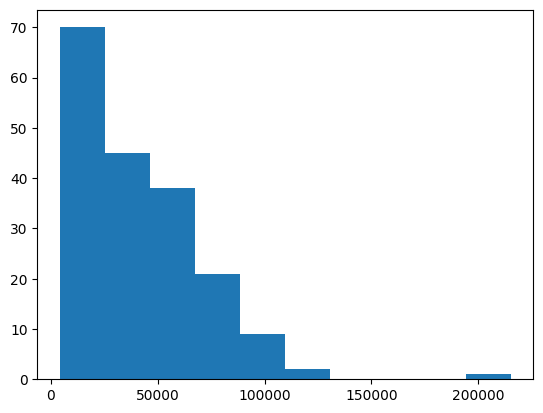

In [88]:
plt.hist(df['Price'])
plt.show()

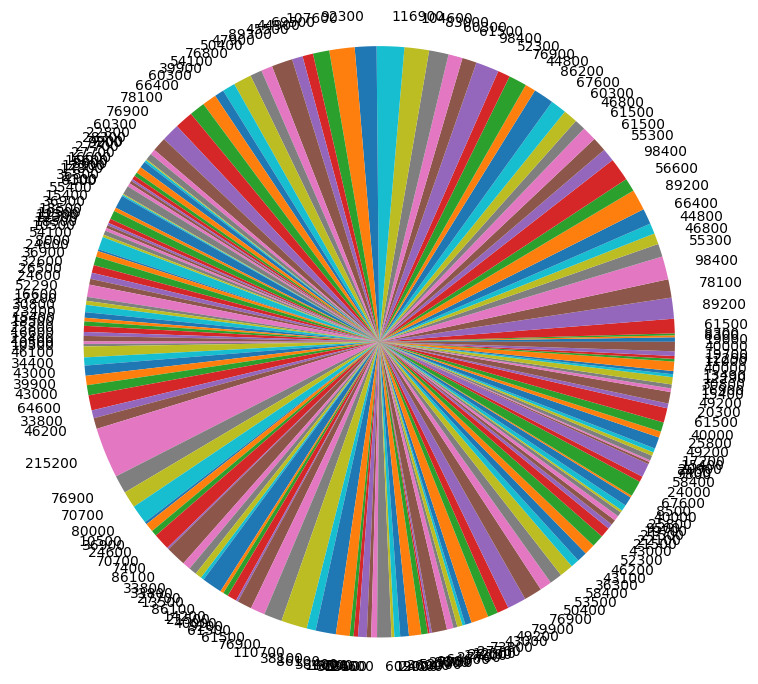

In [95]:
plt.pie(df['Price'],labels=df['Price'],radius=2)
plt.show()